<a href="https://colab.research.google.com/github/dixita5/Deep-Learning/blob/main/CNN_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
img_rows, img_cols = 28, 28

In [8]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_rows,1)

In [9]:
input_shape

(28, 28, 1)

In [11]:
# Type convert and scale the test and training data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /=255
print('X_train shape: ',X_train.shape)
print('X_test shape: ', X_test.shape)
print(y_test[0:3])

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
[9 2 1]


In [15]:
#converting class vectors to binary class matrices -- One hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=None)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=None)

print(y_train[0:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**CNN Code Begins**

In [16]:
# model
model = Sequential()

In [17]:
num_classes = 10

In [18]:
# create a cnn to classify the images
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#define compile to maintain categorical loss, use adam optimizer and optimize to max accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics=['accuracy'])

#train the model and test/validate the model with test data after each cyc;e through training data

hist = model.fit(X_train, y_train,
                 batch_size=64,
                 epochs=24,
                 verbose=1,
                 validation_data = (X_test, y_test))



Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.7255 - loss: 0.7568 - val_accuracy: 0.8497 - val_loss: 0.4085
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.8705 - loss: 0.3551 - val_accuracy: 0.8788 - val_loss: 0.3345
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8898 - loss: 0.3008 - val_accuracy: 0.8911 - val_loss: 0.2994
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.9015 - loss: 0.2693 - val_accuracy: 0.8930 - val_loss: 0.2909
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 51ms/step - accuracy: 0.9091 - loss: 0.2459 - val_accuracy: 0.9005 - val_loss: 0.2733
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9180 - loss: 0.2226 - val_accuracy: 0.9011 - val_loss: 0.2769
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9232 - loss: 0.2078 - val_accuracy: 0.9042 - val_loss: 0.2712
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.9307 - loss: 0.1873 - 

Test loss:  0.41804224252700806
Test accurcay:  0.9101999998092651


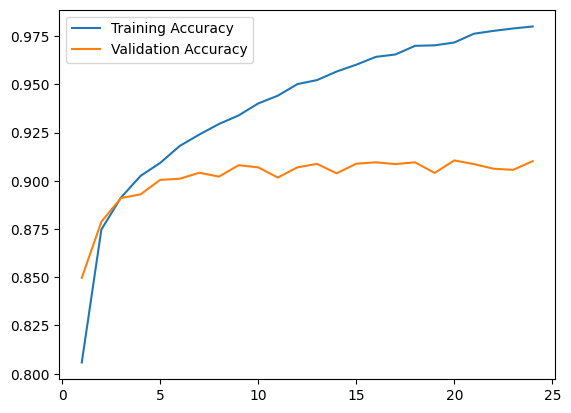

In [22]:
# Evaluate the model with the test data to get the scores on the real data
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accurcay: ", score[1])

#plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy'])+1))
plt.plot(epoch_list, hist.history['accuracy'],epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)